In [149]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from os.path import join as opj
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pylab
plt.rcParams['figure.figsize'] = 10, 10
%matplotlib inline
from sklearn.model_selection import ShuffleSplit, StratifiedShuffleSplit, GroupShuffleSplit

In [86]:
train = pd.read_json("train.json")

In [3]:
train.head(5)

,band_1,band_2,id,inc_angle,is_iceberg
0,"[-27.878360999999998, -27.15416, -28.668615, -...","[-27.154118, -29.537888, -31.0306, -32.190483,...",dfd5f913,43.9239,0
1,"[-12.242375, -14.920304999999999, -14.920363, ...","[-31.506321, -27.984554, -26.645678, -23.76760...",e25388fd,38.1562,0
2,"[-24.603676, -24.603714, -24.871029, -23.15277...","[-24.870956, -24.092632, -20.653963, -19.41104...",58b2aaa0,45.2859,1
3,"[-22.454607, -23.082819, -23.998013, -23.99805...","[-27.889421, -27.519794, -27.165262, -29.10350...",4cfc3a18,43.8306,0
4,"[-26.006956, -23.164886, -23.164886, -26.89116...","[-27.206915, -30.259186, -30.259186, -23.16495...",271f93f4,35.6256,0


In [4]:
X_band_1=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train["band_1"]])

In [5]:
X_band_1.shape


(1604, 75, 75)

In [6]:
X_band_1

array([[[-27.87836075, -27.15415955, -28.66861534, ..., -25.57348251,
         -26.48867416, -30.50701332],
        [-28.66852951, -27.8784008 , -27.50877571, ..., -26.4886322 ,
         -28.67156219, -31.5941658 ],
        [-28.66852951, -27.15415955, -25.86504173, ..., -27.1571064 ,
         -27.88139343, -32.83712387],
        ..., 
        [-29.09290504, -28.66916275, -30.50461197, ..., -30.0110054 ,
         -25.8685379 , -26.48926544],
        [-31.59168243, -27.87899208, -28.66920471, ..., -27.51227188,
         -26.81707382, -27.51235771],
        [-29.09290504, -26.81408119, -27.15479088, ..., -26.81703186,
         -27.8819828 , -28.26812744]],

       [[-12.24237537, -14.92030525, -14.92036343, ..., -10.63340187,
         -11.95605373, -14.37902641],
        [-13.04662609, -14.07784081, -12.72854233, ..., -11.24318886,
         -11.78629112, -14.37902641],
        [-15.24811363, -14.07789993, -12.60451412, ..., -15.68016243,
         -13.51685047, -14.45488739],
        ...,

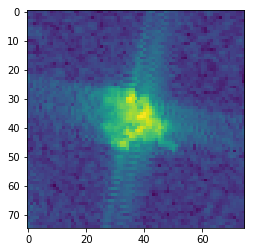

In [7]:
plt.imshow(X_band_1[844,:,:])

In [8]:
train.iloc[844]

band_1        [-22.493793, -23.567535, -24.533672, -23.12209...
band_2        [-27.928608, -27.204409, -27.204453, -27.20449...
id                                                     6edf8ef7
inc_angle                                               43.2925
is_iceberg                                                    0
Name: 844, dtype: object

In [9]:
X_band_2=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train["band_2"]])

In [10]:
X_train = np.concatenate([X_band_1[:, :, :, np.newaxis], X_band_2[:, :, :, np.newaxis],((X_band_1+X_band_2)/2)[:, :, :, np.newaxis]], 
                         axis=-1)

In [11]:
X_train.shape


(1604, 75, 75, 3)

In [12]:
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
def plotmy3d(c, name):

    data = [
        go.Surface(
            z=c
        )
    ]
    layout = go.Layout(
        title=name,
        autosize=False,
        width=700,
        height=700,
        margin=dict(
            l=65,
            r=50,
            b=65,
            t=90
        )
    )
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig)
plotmy3d(X_band_1[844,:,:], 'iceberg')

In [25]:
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping


def get_callbacks(filepath, patience=2):
    es = EarlyStopping('val_loss', patience=patience, mode="min")
    msave = ModelCheckpoint(filepath, save_best_only=True)
    return [es, msave]

file_path = ".model_weights.hdf5"
callbacks = get_callbacks(filepath=file_path, patience=5)

target_train = train['is_iceberg']

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GroupShuffleSplit
import numpy

''''seed = 7
numpy.random.seed(seed)

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
model = KerasClassifier(build_fn=getModel, epochs=10, batch_size=10, verbose=1)

cv = GroupShuffleSplit(n_splits=10,test_size=0.5,\
    train_size=0.5,random_state=seed).split(\
    allr_sets_nor[:,:2],allr_labels,groups=allr_groups)

scores = cross_val_score(model, X_train, target_train, cv=kfold)

print("Значения правильности перекрестной проверки:\n{}".format(scores))

gmodel.load_weights(filepath=file_path)
score = gmodel.evaluate(X_valid, y_valid, verbose=1)
#print('Test loss:', score[0])
#print('Test accuracy:', score[1])
'''
mypotim = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
gmodel.compile(loss='binary_crossentropy', optimizer=mypotim, metrics=['accuracy'])



Using TensorFlow backend.


NameError: name 'Adam' is not defined

In [14]:
mask = (train.inc_angle != 'na').values

In [15]:
mask

array([ True,  True,  True, ..., False, False, False], dtype=bool)

In [16]:
angle = train.inc_angle.values[mask]

In [17]:
angle

array([43.9239, 38.1562, 45.2859, ..., 34.4721, 37.9814, 35.2987], dtype=object)

In [18]:
unique_angle = np.unique(angle)

In [19]:
sort_angle = np.sort(unique_angle)

In [20]:
sort_angle

array([24.7546, 30.1586, 30.4373, 30.4499, 30.4869, 30.4878, 30.6838,
       30.6966, 31.0434, 31.0446, 31.0477, 31.0609, 31.2868, 31.2884,
       31.3119, 31.3403, 31.3404, 31.3431, 31.3432, 31.3685, 31.3701,
       31.3706, 31.3742, 31.3756, 31.384, 31.3954, 31.4138, 31.4597,
       31.5507, 31.5671, 31.5797, 32.178, 32.1845, 32.1884, 32.1906,
       32.2141, 32.2297, 32.2419, 32.251, 32.2567, 32.2599, 32.265,
       32.3102, 32.3183, 32.3663, 32.3976, 32.4245, 32.7838, 32.7848,
       32.785, 32.7851, 32.7878, 32.801, 33.0525, 33.0556, 33.0605,
       33.0644, 33.0766, 33.079, 33.0797, 33.1315, 33.136, 33.1379,
       33.1518, 33.1761, 33.1855, 33.1877, 33.1899, 33.1988, 33.2077,
       33.2169, 33.2251, 33.2825, 33.2936, 33.4034, 33.634, 33.635,
       33.6352, 33.6383, 33.6393, 33.6511, 33.6523, 33.6526, 33.8975,
       33.9014, 33.9178, 33.9214, 33.9229, 33.923, 33.9235, 33.9303,
       33.9315, 33.9415, 33.9628, 33.9843, 33.9931, 33.9978, 34.0021,
       34.0048, 34.0171, 34.018

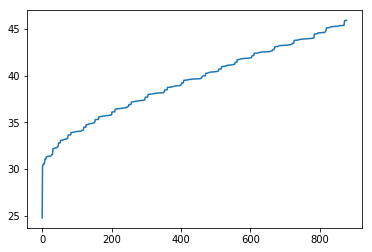

In [21]:
plt.plot(sort_angle)

In [35]:
np.linspace(sort_angle.min(), sort_angle.max(), 4)

array([ 24.7546    ,  31.81556667,  38.87653333,  45.9375    ])

In [130]:
x = sort_angle.astype(float)
bins = [24.0, 34.0, 43.0, 53.0]
np.digitize(x, bins)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2,

In [207]:
x = angle.astype(float)
bins = [24.0, 34.0, 43.0, 53.0]
np.digitize(x, bins)


array([3, 2, 3, ..., 2, 2, 2], dtype=int64)

In [37]:
from sklearn.model_selection import ShuffleSplit

In [67]:
rs = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)

In [82]:
a = rs.split(X_train)

In [83]:
a.next()

AttributeError: 'generator' object has no attribute 'next'

In [115]:
gss = GroupShuffleSplit(n_splits=1, random_state=0)
for train_index, test_index in gss.split(X_without_na, Y_without_na, groups=groups):
    print(1)

1


In [219]:
def GroupShuffleStratifiedS_angle(X,y,angle, splits = 1, bins = [24.0, 34.0, 43.0, 53.0]):
	
	mask = (angle != 'na').values
	angle = angle.values[mask]
	sort_angle = np.sort(angle)
	
	x = angle.astype(float)
	#bins = np.linspace(sort_angle.min(), sort_angle.max(), bins)
	groups = np.digitize(x, bins)
	
	X_without_na = X[mask,:,:,:]
	Y_without_na = y.values[mask]
	print(groups)
	gss = StratifiedShuffleSplit(n_splits=splits, random_state=0)
	train_index, test_index = next(gss.split(X_without_na, groups))
	
	return X[train_index],X[test_index],y[train_index],y[test_index]

In [220]:
X_without_na = X_train[mask,:,:,:]
Y_without_na = target_train.values[mask]

In [221]:
X_train.shape

(1604, 75, 75, 3)

In [222]:
np.unique(GroupShuffleStratifiedS_angle(X_train, target_train, train.inc_angle)[1])

[3 2 3 ..., 2 2 2]


array([-43.16743469, -43.16702271, -43.13150406, ...,  23.2260704 ,
        24.89125061,  25.5666275 ], dtype=float32)

In [27]:
X_without_na = X_train[mask,:,:,:]
Y_without_na = target_train.values[mask]

In [29]:
gss = GroupShuffleSplit(n_splits=4, random_state=0)
for train, test in gss.split(X_without_na, Y_without_na, groups=groups):
     print("%s %s" % (train, test))
     break

[   1    4    5 ..., 1468 1469 1470] [   0    2    3    9   10   13   15   16   27   32   33   43   44   52   67
   72   73   85   88   90   95  106  112  113  114  116  119  121  128  130
  131  137  149  157  163  170  178  179  183  187  193  198  202  203  212
  213  218  219  228  230  237  239  241  244  247  257  259  261  264  270
  291  295  296  297  299  301  313  317  318  320  321  322  323  333  340
  341  346  347  351  354  355  359  361  362  365  373  375  383  384  389
  404  414  417  422  431  436  440  444  449  451  454  465  469  472  473
  474  479  482  493  501  503  507  508  511  512  513  525  526  527  533
  534  537  541  553  560  562  567  579  591  598  599  602  606  607  613
  617  619  624  625  627  630  631  637  646  653  668  671  676  682  683
  685  686  689  690  691  696  699  710  711  721  735  740  750  754  759
  761  762  767  784  801  803  805  806  808  822  825  830  833  835  846
  848  851  854  855  856  857  861  862  863  869 

In [36]:
Y_without_na[train]

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [ ]:
tensorboard = TensorBoard(log_dir="logs/{}".format(time()))

# Augmentation


In [47]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [49]:
datagen = ImageDataGenerator(horizontal_flip =True)

In [55]:
datagen.fit(X_train)

In [64]:
i=0
for X_batch, y_batch in datagen.flow(X_train, target_train, batch_size=9):
    i+=1
    print(X_batch[0])
    break
print(X_batch[0])
    

[[[-21.78935242 -29.21071053 -25.50003052]
  [-24.34999466 -27.62713242 -25.98856354]
  [-20.58352661 -28.38294983 -24.48323822]
  ..., 
  [-24.10852623 -27.63035202 -25.86943817]
  [-21.79266739 -25.40739059 -23.60002899]
  [-20.27091026 -26.60739517 -23.43915176]]

 [[-22.16710663 -27.62713242 -24.89711952]
  [-20.58352661 -30.12595177 -25.35474014]
  [-20.42419434 -31.70962334 -26.06690979]
  ..., 
  [-28.38612366 -26.29141808 -27.33877182]
  [-23.63895226 -26.29146385 -24.96520805]
  [-20.91460228 -27.63044548 -24.27252388]]

 [[-21.60653114 -28.38290215 -24.99471664]
  [-21.60657883 -31.14900398 -26.37779236]
  [-21.6066246  -30.12599754 -25.86631012]
  ..., 
  [-27.63035202 -25.13157845 -26.38096619]
  [-25.40739059 -25.98666382 -25.69702721]
  [-22.76968384 -28.38621521 -25.57794952]]

 ..., 
 [[-24.1059494  -24.1059494  -24.1059494 ]
  [-27.27324486 -23.63637543 -25.4548111 ]
  [-22.16784286 -26.28893089 -24.22838593]
  ..., 
  [-22.56585312 -26.29206085 -24.42895699]
  [-22.77

In [ ]:
datagen_args = dict(rotation_range=10,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True)

In [74]:
datagens = [ImageDataGenerator(**datagen_args),
            ImageDataGenerator(**datagen_args)]

sid = 240
for i, image in enumerate(image_pair):
    image = plt.imread(os.path.join(IMAGE_DIR, image_pair[i]))
    sid += 1
    draw_image(sid, image, "orig")
    # make sure the two image data generators generate same transformations
    np.random.seed(42)
    for j in range(3):
        augmented = datagens[i].random_transform(image)
        sid += 1
        draw_image(sid, augmented, "aug#{:d}".format(j + 1))

plt.tight_layout()
plt.show()

TypeError: 'ImageDataGenerator' object does not support indexing

In [1]:
from keras.callbacks import TensorBoard
from time import time
 gmodel=Sequential()

Using TensorFlow backend.
